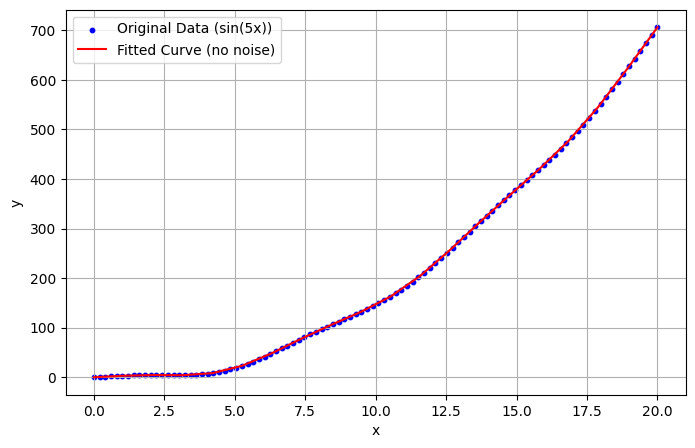

2.0 -5.000000000000002 6.999999999999999


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# defining the model function y = a * sin(bx) + c * cos(dx)
def model_func(x_data, a, b, c):
  return a*(x_data)**2 + b*x_data + c*np.sin(x_data)

#    return a * np.sin(b * x) + c * np.cos(d * x)

# main function y = sin(5x)
x_data = np.linspace(0, 20, 100)  # X values (0 to 2π)
y_data = 2*(x_data)**2 - 5*x_data + 7*np.sin(x_data)
#y_data = np.sin(5 * x_data) + np.cos(x_data)  # True y values (sin(5x))

x_test = np.linspace(0, 20, 20)  # X values (0 to 2π)


# performing curve fitting to estimate the parameters a, b, c, d
popt, pcov = curve_fit(model_func, x_data, y_data)  # p0 = Initial guesses

# updated parameters
a_fitted, b_fitted, c_fitted = popt


# plotting
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Original Data (sin(5x))', color='blue', s=10)
plt.plot(x_test, model_func(x_test, *popt), label='Fitted Curve (no noise)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()

print(*popt)

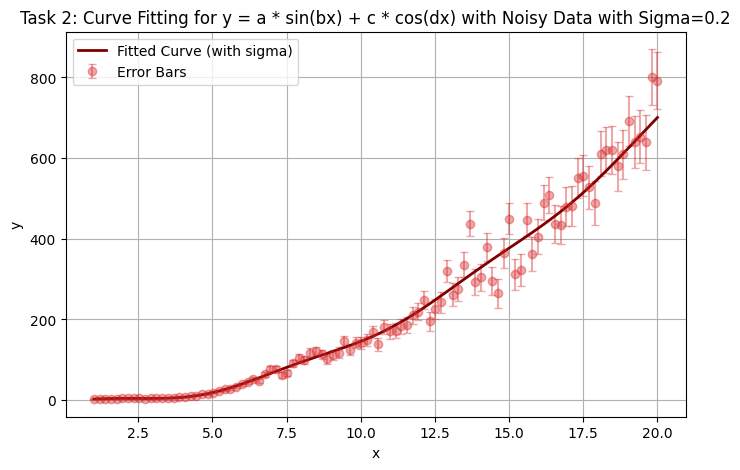

1.9797045519763712 -4.86591013715644 6.731007945467373


array([0.00077913, 0.0122535 , 0.03156522])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# defining the model function y = a * sin(bx) + c * cos(dx)
def model_func(x, a, b, c):
    return a*(x)**2 + b*x + c*np.sin(x)

# main function y = sin(5x)
x_data = np.linspace(1, 20, 100)  # X values (0 to 2π)
y_data = 2*(x_data)**2 - 5*x_data + 7*np.sin(x_data)


# std deviation (error)
sigma = 0.1 * y_data
sigma_array = np.full_like(y_data, sigma)  # array of the same shape as y_data with constant sigma

# random noise to the data
random_noise = np.random.normal(0, sigma, len(y_data))  # Gaussian noise with mean 0 and std deviation 0.2
y_noisy_data = y_data + random_noise  # noisy data


# curve_fitting with noisy data
popt_noisy, pcov_noisy = curve_fit(model_func, x_data, y_noisy_data, p0=[1,2,1], sigma=sigma_array)

# updated parameters for noisy data
a_fitted_noisy, b_fitted_noisy, c_fitted_noisy, = popt_noisy

plt.figure(figsize=(8, 5))
#plt.scatter(x_data, y_noisy_data, label='Noisy Data', color='green', s=10)  # Scatter of noisy data
plt.errorbar(x_data, y_noisy_data, yerr=sigma, fmt='o', color='tab:red', label='Error Bars', alpha=0.4, capsize=3) #alpha(opacity), capsize() # Error bars
plt.plot(x_data, model_func(x_data, *popt_noisy), label='Fitted Curve (with sigma)', color='maroon', linewidth=2)  # Fitted curve
plt.xlabel('x')
plt.ylabel('y')
plt.title('Task 2: Curve Fitting for y = a * sin(bx) + c * cos(dx) with Noisy Data with Sigma=0.2')
plt.legend()
plt.grid(True)
plt.show()
print(*popt_noisy)
np.diag(pcov_noisy)

In [ ]:
random_noise = np.random.uniform(-0.2, 0.2, len(y_data))